#UTS Mata Kuliah Machine Learning

Nama : Neo Saffana Farhalik

NIM : 4112322008

Prodi : Statistika Terapan dan Komputasi

##Import Library & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('data_training.csv')
df_test = pd.read_csv('data_testing.csv')

df_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


#Cek Info & Missing Values

In [ ]:
df_train.info()

print("Missing values di training data:")
print(df_train.isnull().sum())

print("\nMissing values di testing data:")
print(df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
Missing values di training data:
fixed acidity           0
volatile acidity   

Tidak ada missing value

#Eksplorasi Target dan Korelasi

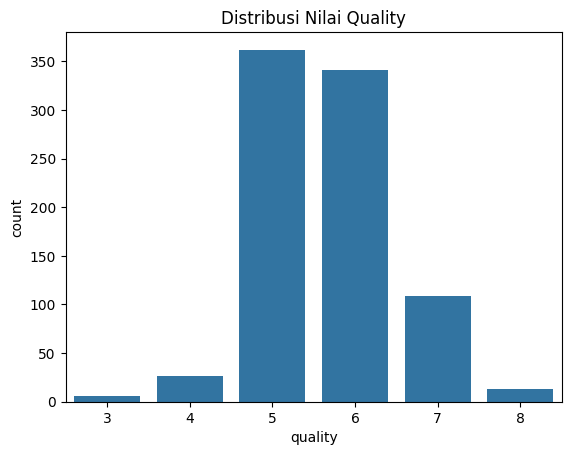

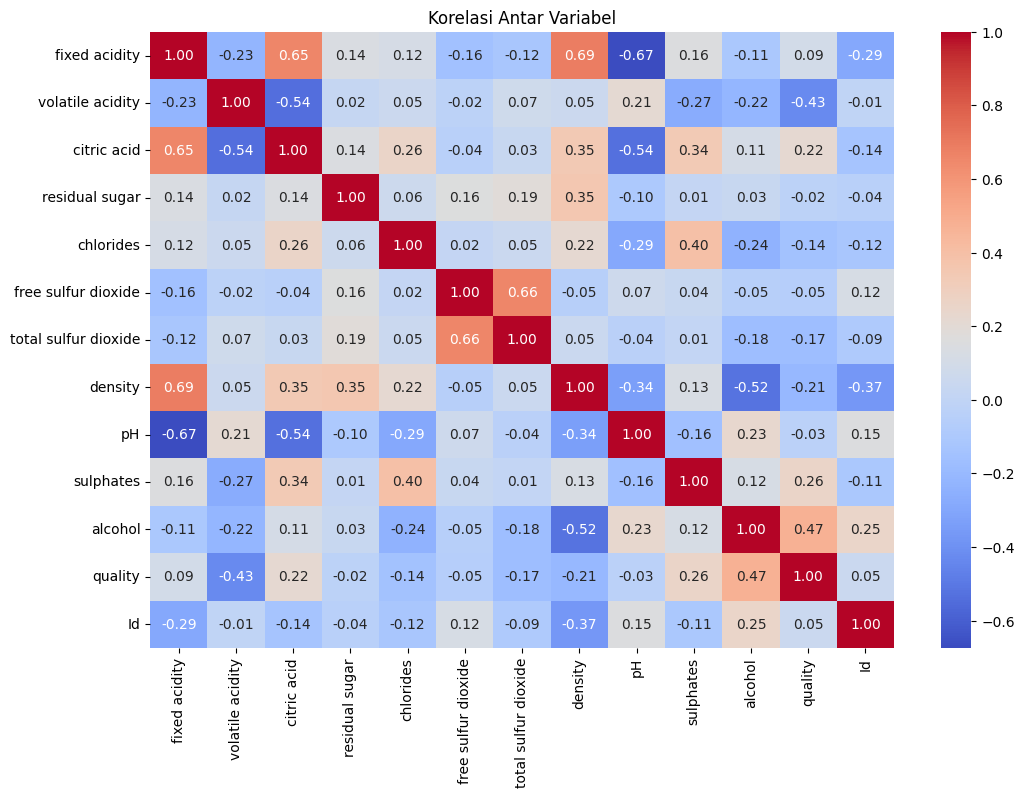

In [ ]:
sns.countplot(x='quality', data=df_train)
plt.title("Distribusi Nilai Quality")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

Penjelasan :
1. Beberapa angka kualitas jauh lebih sedikit, berarti dataset imbalanced.
2. Membuat heatmap korelasi antar fitur dan label untuk melihat fitur mana yang paling berkorelasi dengan target (quality) atau dengan fitur lain.
3. Korelasi tinggi antar fitur, bisa menyebabkan redundansi informasi.
4. Korelasi tinggi fitur vs quality, bagus untuk prediksi.

#Preprocessing

Disini saya memisahkan fitur dan target dan melakukan scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = df_train.drop(columns=['quality'])
y_train = df_train['quality']

feature_columns = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(df_test)

Penjelasan :
1. Memisahkan fitur (X_train) dan target (y_train).
2. quality dihapus dari X karena itu label yang ingin diprediksi.

#Modeling & Evaluasi

Menggunakan metode Random Forest Classifier.

Penjelasan tiap parameter :
* n_estimators=300 → 300 pohon, makin banyak pohon = prediksi lebih stabil.
* max_depth=25 → membatasi kedalaman pohon agar tidak overfitting.
* min_samples_split=4 & min_samples_leaf=2 → menghindari node terlalu kecil, biar generalisasi lebih bagus.
* max_features='sqrt' → subset fitur acak, bagus buat Random Forest.
* class_weight='balanced' → menangani class imbalance secara otomatis.
* bootstrap=True → pakai sampling acak untuk setiap pohon (bagging).
* n_jobs=-1 → pakai semua core CPU untuk mempercepat training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd


rf_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_classifier.fit(X_train_split, y_train_split)

y_pred_rf_classifier = rf_classifier.predict(X_val_split)

print("Confusion Matrix:")
print(confusion_matrix(y_val_split, y_pred_rf_classifier))

print("\nClassification Report:")
print(classification_report(y_val_split, y_pred_rf_classifier))

print(f"\nAkurasi: {accuracy_score(y_val_split, y_pred_rf_classifier):.4f}")

Confusion Matrix:
[[ 0  1  2  0  0]
 [ 0 47 20  0  0]
 [ 0 23 51  4  0]
 [ 0  0  9 12  0]
 [ 0  0  0  3  0]]

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.66      0.70      0.68        67
           6       0.62      0.65      0.64        78
           7       0.63      0.57      0.60        21
           8       0.00      0.00      0.00         3

    accuracy                           0.64       172
   macro avg       0.38      0.39      0.38       172
weighted avg       0.62      0.64      0.63       172


Akurasi: 0.6395


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Analisis :
* Kelas 5 & 6 paling dominan, model cukup baik di sini (F1 ≈ 0.64–0.68)
* Kelas 7 masih lumayan (F1 = 0.60)
* Kelas 4 & 8 parah banget (semua salah klasifikasi, F1 = 0)

Kesimpulan :
* Model cukup bagus untuk kelas mayoritas (5, 6, 7).
* Sangat buruk untuk kelas minoritas (4 dan 8).
* Imbalanced class problem terlihat jelas.
* Akurasi dan weighted average F1 mendekati 0.64 (stabil)

#Melakukan Prediksi

In [ ]:
y_test_pred_rf_classifier = rf_classifier.predict(X_test_scaled)

hasil_rf_classifier = pd.DataFrame({
    'Id': df_test['Id'],
    'quality': y_test_pred_rf_classifier
})

hasil_rf_classifier.to_csv('hasilprediksi_008_rf_classifier.csv', index=False)